<span STYLE="font-size:200%"> 
    Lineplot showing mean values of each group
</span>

Docker image: gnasello/datascience-env:2024-06-12\
Latest update: 12 June 2024

# Load required packages

In [1]:
library(ggplot2)
library(dplyr)
library(ggplotUtils)
library(statsUtils)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load data

In [2]:
filetable <- 'data.csv'

title <- 'Plot Title'
xlabel <- 'Time (day)'
ylabel <- 'Cumulative release (%)'

# color of each group
scale_color_manual.values <- c("#004488", "#dca01c")

df <- read.csv(filetable)
head(df)
tail(df)

,group,x,y
,<chr>,<dbl>,<dbl>
1,Diffusion-controlled,0.083,20.74965
2,Diffusion-controlled,0.083,23.29115
3,Diffusion-controlled,0.083,19.27960
4,Diffusion-controlled,0.083,23.83968
5,Diffusion-controlled,0.083,21.76991
6,Diffusion-controlled,0.250,41.67175


,group,x,y
,<chr>,<dbl>,<dbl>
155,Dissolution-controlled,13,102.48629
156,Dissolution-controlled,14,95.50348
157,Dissolution-controlled,14,103.31377
158,Dissolution-controlled,14,96.75397
159,Dissolution-controlled,14,102.12253
160,Dissolution-controlled,14,102.64808


# Line plot of `y` over `x`

## Summarize the data

The function below will be used to calculate the mean and the standard deviation, for the variable of interest, in each group. See [tutorial](http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization#line-graph-with-error-bars)

In [3]:
df_summary <- data_summary(df, varname="y", 
                           groupnames=c("group", "x"))
df_summary <- df_summary[complete.cases(df_summary$x),]

df_summary

,group,x,mean,sd
,<chr>,<dbl>,<dbl>,<dbl>
1,Diffusion-controlled,0.083,21.785998,1.860068
2,Diffusion-controlled,0.250,43.839969,4.079103
3,Diffusion-controlled,1.000,73.542736,5.014713
4,Diffusion-controlled,2.000,94.429150,5.939593
5,Diffusion-controlled,3.000,96.767335,6.111691
6,Diffusion-controlled,4.000,96.849131,6.063237
7,Diffusion-controlled,5.000,97.769339,5.836008
8,Diffusion-controlled,6.000,97.793708,5.810165
9,Diffusion-controlled,7.000,97.964848,5.988011


## Bar plot with point data

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


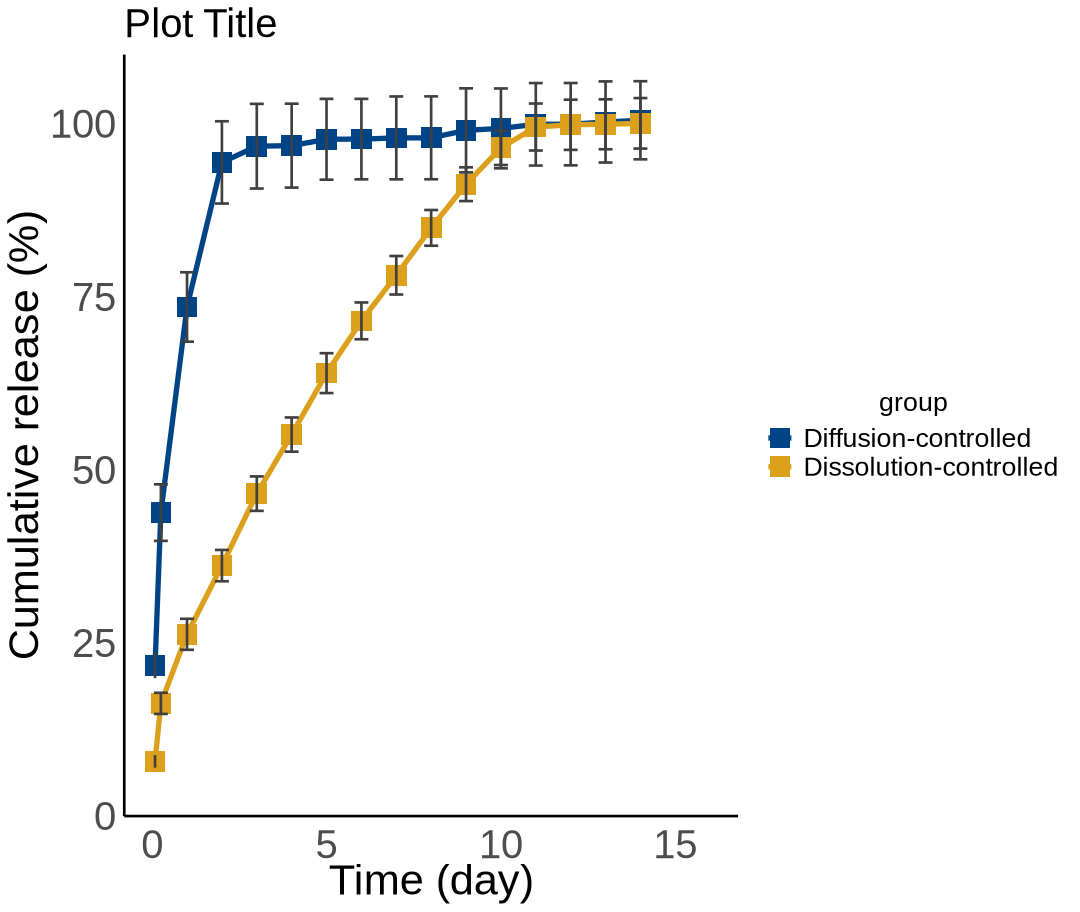

In [4]:
color='#404040ff'

ylim <- c(0,110)
xlim <- c(0,16)
width=9
height=7.6

p <- ggplot() +
     geom_line(data=df_summary, aes(x=x, y=mean, color=group), linewidth=1.5) +
     geom_point(data=df_summary, aes(x=x, y=mean, color=group), size=4.5, shape=15, stroke=2) +
     geom_errorbar(data=df_summary, aes(x=x, y=mean, ymin=mean-sd, ymax=mean+sd), width=.4, linewidth=0.75, color=color)

img <- ggplotMinAethetics(p, width=width, height=height,
                           title=title,
                           plot.title = element_text(size = 24),
                           axis.text=element_text(size=24),
                           axis.title=element_text(size=26),
                           xlabel = xlabel, 
                           ylabel= ylabel, 
                           xlim = xlim,
                           ylim = ylim,
                           scale_color_manual.values = scale_color_manual.values,
                          ) + 
            theme(axis.line.x.bottom=element_line(size=0.75),
                  axis.line.y.left=element_line(size=0.75))#+
            # scale_x_continuous(breaks = seq(0, 16, by = 3))

img

# Export plot

In [5]:
filename <- tools::file_path_sans_ext(filetable)
filename

[1] "data"

## `.png` file

In [6]:
fileoutput <- paste(filename,'.png', sep='')
fileoutput

[1] "data.png"

In [7]:
ggsave(file=fileoutput, plot=img, width=width, height=height, bg='white')

## `.svg` file

In [8]:
fileoutput <- paste(filename,'.svg', sep='')
fileoutput

[1] "data.svg"

In [9]:
ggsave(file=fileoutput, plot=img, width=width, height=height)